## Pair Programming - Regresión logística 2

### Procesado

---

In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
from sklearn.model_selection import train_test_split

#  Configuración de warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../archivos/travel_1.csv', index_col=0)
df.head()

,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commision_(in_value),gender,age
Agency,,,,,,,,,,
CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,PNS,32
CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,PNS,32
CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,PNS,41


**Objetivos:**

### 1. Estandarizar las variables numéricas de vuestro set de datos.

### 2. Codificar las variables categóricas. Tener en cuenta si las variables tienen orden o no.

### 3. Chequear si los datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.

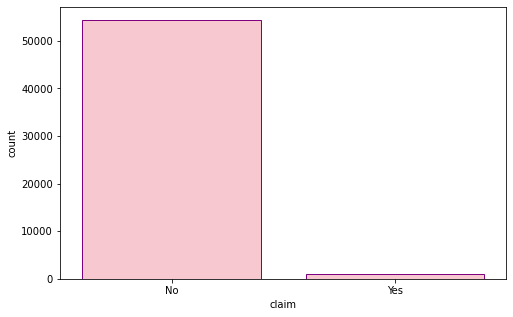

In [10]:
plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = "claim", color = "pink",  edgecolor='purple')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

In [6]:
#Porcentajes variable respuesta
df["claim"].value_counts() / df.shape[0]

No     0.98334
Yes    0.01666
Name: claim, dtype: float64

In [7]:
# Separamos la variable respuesta de las predictoras
y = df['claim']
X = df.drop('claim', axis=1)

In [8]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

In [ ]:
y_train_res.value_counts()

In [ ]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

### 4. Guardad el dataframe.